<a href="https://colab.research.google.com/github/akshitkaranam/CZ4042-Project/blob/main/CZ4042_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Initialization

In [ ]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:
Ravdess = "/content/drive/MyDrive/CZ4042/CZ4042 Project/RAVDESS"
# Crema = "/content/drive/MyDrive/CZ4042/CZ4042 Project/AudioWAV"
Tess = "/content/drive/MyDrive/CZ4042/CZ4042 Project/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data"

In [ ]:
ravdess_directory_list = os.listdir(Ravdess)
print(ravdess_directory_list)
file_emotion = []
file_path = []
file_gender=[]
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + '/'+dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        if(int(part[6])%2==0):
          file_gender.append('female')
        elif (int(part[6])%2==1):
          file_gender.append('male')
        #file_gender.append(int(part[6]))
        file_path.append(Ravdess + '/'+ dir + '/' + file)
        
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
gender_df=pd.DataFrame(file_gender,columns=['Gender'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
Ravdess2_df = pd.concat([emotion_df, path_df,gender_df], axis=1)
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess2_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess2_df

['Actor_10', 'Actor_16', 'Actor_11', 'Actor_03', 'Actor_21', 'Actor_19', 'Actor_17', 'Actor_20', 'Actor_04', 'Actor_18', 'Actor_02', 'Actor_12', 'Actor_22', 'Actor_15', 'Actor_23', 'Actor_14', 'Actor_24', 'Actor_05', 'Actor_13', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_06', 'Actor_01']


Emotions                                               Path  Gender
0        happy  /content/drive/MyDrive/CZ4042/CZ4042 Project/R...  female
1          sad  /content/drive/MyDrive/CZ4042/CZ4042 Project/R...  female
2        happy  /content/drive/MyDrive/CZ4042/CZ4042 Project/R...  female
3          sad  /content/drive/MyDrive/CZ4042/CZ4042 Project/R...  female
4        happy  /content/drive/MyDrive/CZ4042/CZ4042 Project/R...  female
...        ...                                                ...     ...
1435  surprise  /content/drive/MyDrive/CZ4042/CZ4042 Project/R...    male
1436     angry  /content/drive/MyDrive/CZ4042/CZ4042 Project/R...    male
1437     angry  /content/drive/MyDrive/CZ4042/CZ4042 Project/R...    male
1438      fear  /content/drive/MyDrive/CZ4042/CZ4042 Project/R...    male
1439  surprise  /content/drive/MyDrive/CZ4042/CZ4042 Project/R...    male

[1440 rows x 3 columns]

In [ ]:
Ravdess_df.Emotions.value_counts()

happy       192
sad         192
calm        192
disgust     192
angry       192
surprise    192
fear        192
neutral      96
Name: Emotions, dtype: int64

In [ ]:
tess_directory_list = os.listdir(Tess)
print(tess_directory_list)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + '/'+ dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + '/'+  dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess2_df=Tess_df

['OAF_angry', 'OAF_Fear', 'OAF_disgust', 'OAF_happy', 'OAF_neutral', 'YAF_fear', 'OAF_Sad', 'OAF_Pleasant_surprise', 'YAF_angry', 'YAF_disgust', 'YAF_pleasant_surprised', 'YAF_sad', 'YAF_neutral', 'YAF_happy']


## Gender Separation Across the Dataset

In [ ]:
Ravdess2_df.Gender.value_counts()

female    720
male      720
Name: Gender, dtype: int64

In [ ]:
Tess2_df['Gender']='female'
Tess2_df

Emotions                                               Path  Gender
0       angry  /content/drive/MyDrive/CZ4042/CZ4042 Project/T...  female
1       angry  /content/drive/MyDrive/CZ4042/CZ4042 Project/T...  female
2       angry  /content/drive/MyDrive/CZ4042/CZ4042 Project/T...  female
3       angry  /content/drive/MyDrive/CZ4042/CZ4042 Project/T...  female
4       angry  /content/drive/MyDrive/CZ4042/CZ4042 Project/T...  female
...       ...                                                ...     ...
2795    happy  /content/drive/MyDrive/CZ4042/CZ4042 Project/T...  female
2796    happy  /content/drive/MyDrive/CZ4042/CZ4042 Project/T...  female
2797    happy  /content/drive/MyDrive/CZ4042/CZ4042 Project/T...  female
2798    happy  /content/drive/MyDrive/CZ4042/CZ4042 Project/T...  female
2799    happy  /content/drive/MyDrive/CZ4042/CZ4042 Project/T...  female

[2800 rows x 3 columns]

In [ ]:
Tess_df.Emotions.value_counts()

angry       400
fear        400
disgust     400
happy       400
neutral     400
sad         400
surprise    400
Name: Emotions, dtype: int64

In [ ]:
data_path2 = pd.concat([Ravdess2_df, Tess2_df], axis = 0)

In [ ]:
data_path2.reset_index(inplace=True, drop=True) 
data_path2

Emotions                                               Path  Gender
0       happy  /content/drive/MyDrive/CZ4042/CZ4042 Project/R...  female
1         sad  /content/drive/MyDrive/CZ4042/CZ4042 Project/R...  female
2       happy  /content/drive/MyDrive/CZ4042/CZ4042 Project/R...  female
3         sad  /content/drive/MyDrive/CZ4042/CZ4042 Project/R...  female
4       happy  /content/drive/MyDrive/CZ4042/CZ4042 Project/R...  female
...       ...                                                ...     ...
4235    happy  /content/drive/MyDrive/CZ4042/CZ4042 Project/T...  female
4236    happy  /content/drive/MyDrive/CZ4042/CZ4042 Project/T...  female
4237    happy  /content/drive/MyDrive/CZ4042/CZ4042 Project/T...  female
4238    happy  /content/drive/MyDrive/CZ4042/CZ4042 Project/T...  female
4239    happy  /content/drive/MyDrive/CZ4042/CZ4042 Project/T...  female

[4240 rows x 3 columns]

In [ ]:
data_path2.Gender

0       female
1       female
2       female
3       female
4       female
         ...  
4235    female
4236    female
4237    female
4238    female
4239    female
Name: Gender, Length: 4240, dtype: object

In [ ]:
calm = data_path2.loc[data_path2['Emotions']=='calm', :]['Emotions'].value_counts()
calm

calm    192
Name: Emotions, dtype: int64

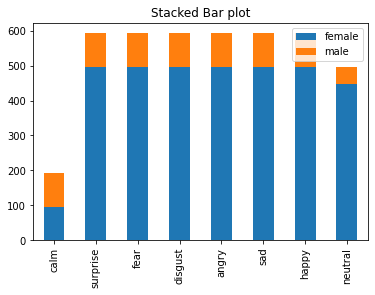

In [ ]:
calm = data_path2.loc[data_path2['Emotions']=='calm', :]['Gender'].value_counts()
surprise = data_path2.loc[data_path2['Emotions']=='surprise', :]['Gender'].value_counts()
fear = data_path2.loc[data_path2['Emotions']=='fear', :]['Gender'].value_counts()
disgust = data_path2.loc[data_path2['Emotions']=='disgust', :]['Gender'].value_counts()
angry = data_path2.loc[data_path2['Emotions']=='angry', :]['Gender'].value_counts()
sad = data_path2.loc[data_path2['Emotions']=='sad', :]['Gender'].value_counts()
happy = data_path2.loc[data_path2['Emotions']=='happy', :]['Gender'].value_counts()
neutral = data_path2.loc[data_path2['Emotions']=='neutral', :]['Gender'].value_counts()
df_plot  = pd.DataFrame([calm,surprise,fear,disgust,angry,sad,happy,neutral])
df_plot.index=['calm','surprise','fear','disgust','angry','sad','happy','neutral']

# Plot
df_plot.plot(kind='bar',stacked=True, title='Stacked Bar plot');

## Individual Emotion Analysis

In [ ]:
data_path=pd.read_csv("/content/drive/MyDrive/CZ4042/CZ4042 Project/data_path_tess.csv")

In [ ]:
data_path

Emotions                                               Path
0       happy  /content/drive/MyDrive/CZ4042/CZ4042 Project/R...
1         sad  /content/drive/MyDrive/CZ4042/CZ4042 Project/R...
2       happy  /content/drive/MyDrive/CZ4042/CZ4042 Project/R...
3         sad  /content/drive/MyDrive/CZ4042/CZ4042 Project/R...
4       happy  /content/drive/MyDrive/CZ4042/CZ4042 Project/R...
...       ...                                                ...
4235    happy  /content/drive/MyDrive/CZ4042/CZ4042 Project/T...
4236    happy  /content/drive/MyDrive/CZ4042/CZ4042 Project/T...
4237    happy  /content/drive/MyDrive/CZ4042/CZ4042 Project/T...
4238    happy  /content/drive/MyDrive/CZ4042/CZ4042 Project/T...
4239    happy  /content/drive/MyDrive/CZ4042/CZ4042 Project/T...

[4240 rows x 2 columns]

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

Since we use RAVDESS and Crema-D, we will be doing analysis of each emotion for both the datasets

###1) Fear

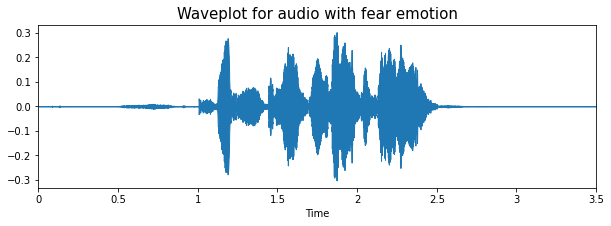

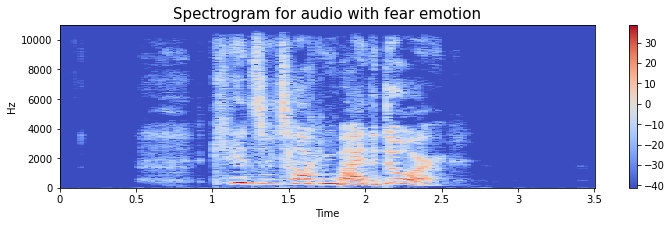

In [ ]:
#RAVDESS
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

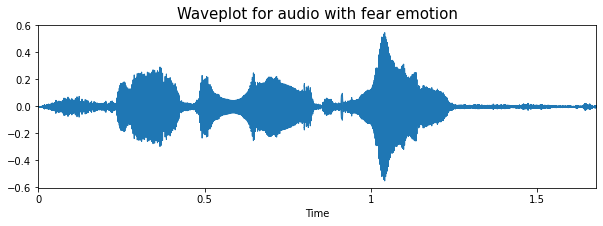

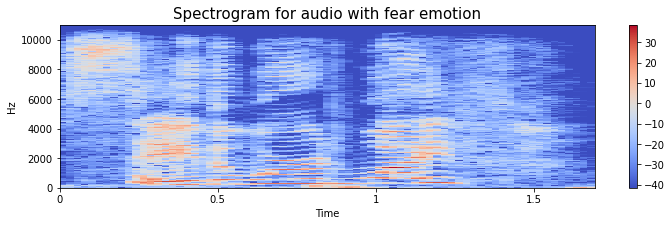

In [ ]:
#TESS
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[591]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

###2) Angry

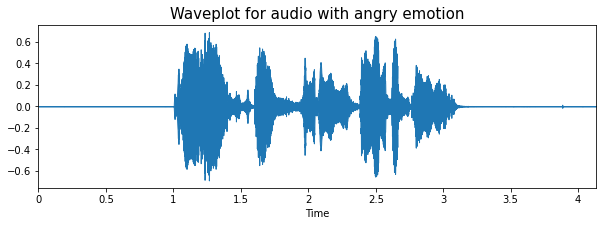

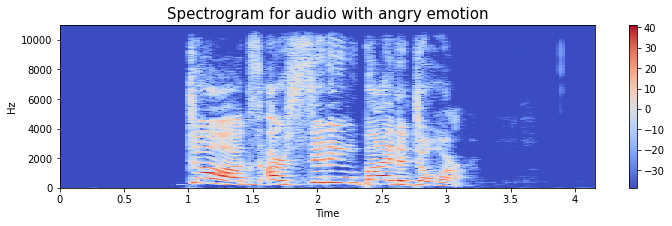

In [ ]:
#RAVDESS
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

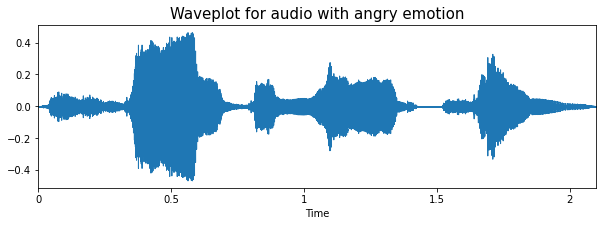

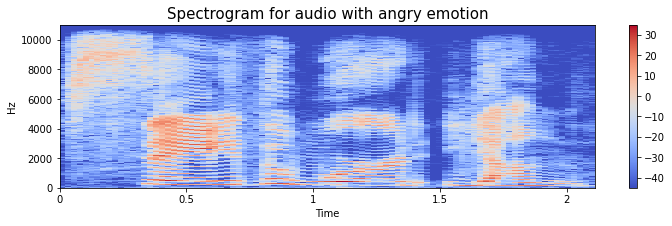

In [ ]:
#TESS
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[591]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

###3) Sad

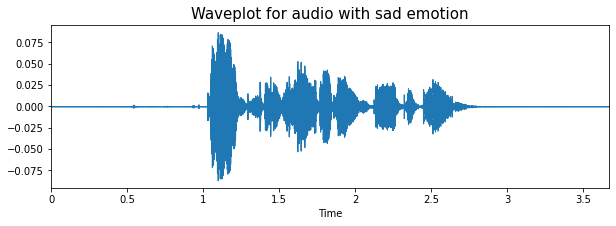

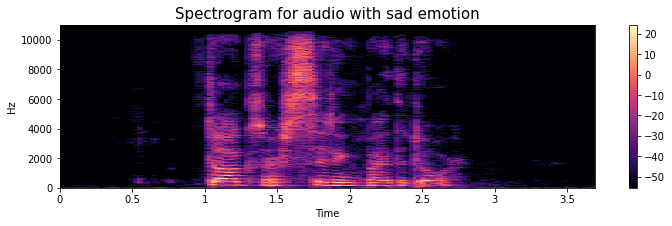

In [ ]:
#RAVDESS
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

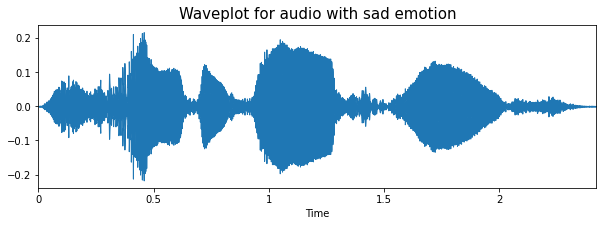

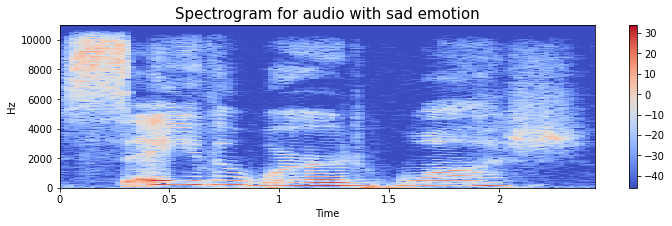

In [ ]:
#TESS
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[591]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

###4) Happy

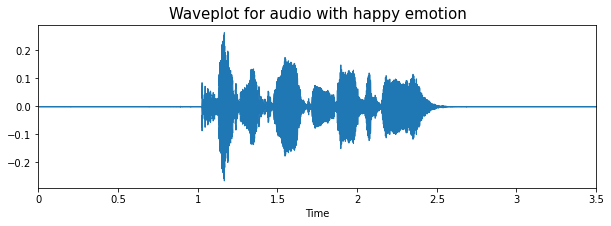

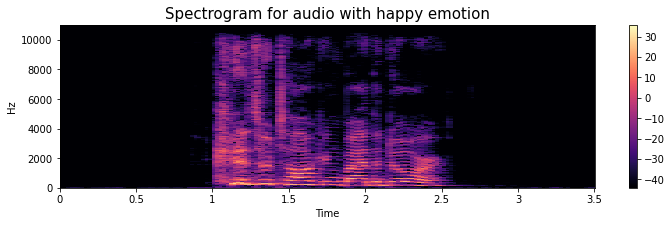

In [ ]:
#RAVDESS
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

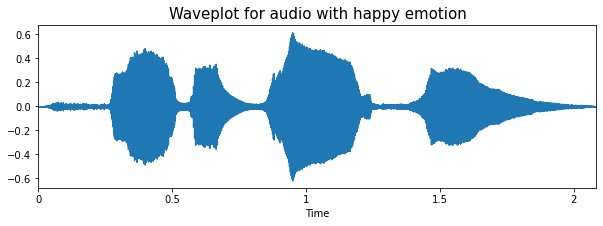

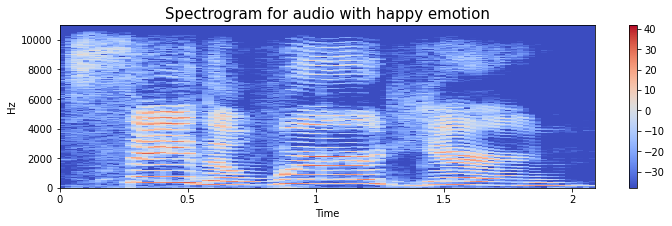

In [ ]:
#TESS
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[591]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

###5) Calm

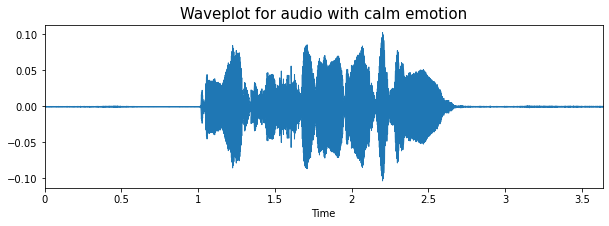

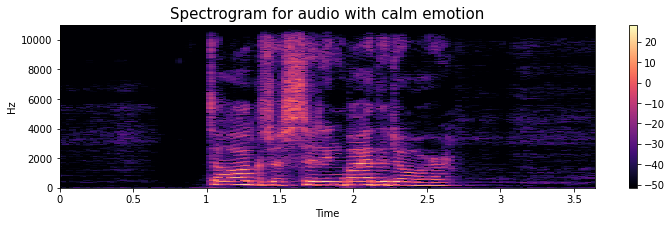

In [ ]:
#RAVDESS
emotion='calm'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

###6) Disgust

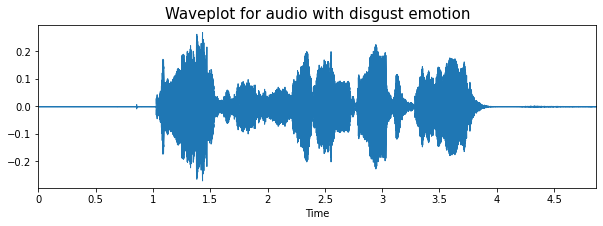

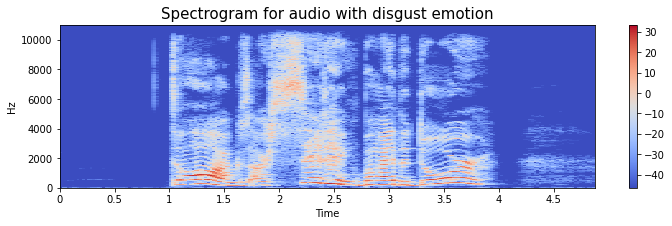

In [ ]:
#RAVDESS
emotion='disgust'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

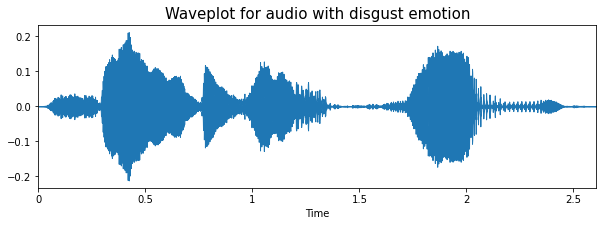

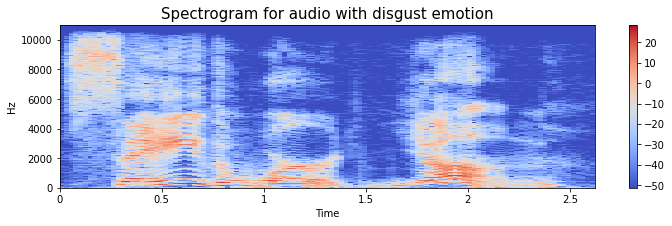

In [ ]:
#TESS
emotion='disgust'
path = np.array(data_path.Path[data_path.Emotions==emotion])[591]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

###7) Neutral

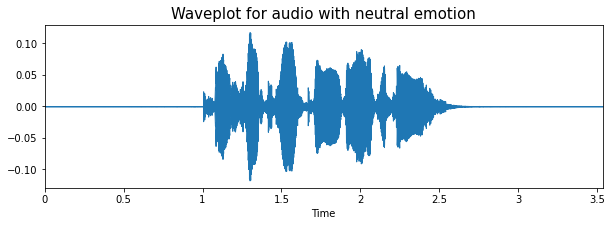

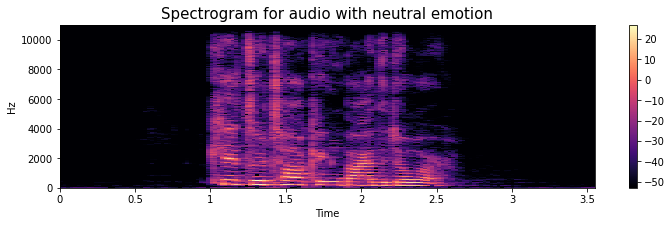

In [ ]:
#RAVDESS
emotion='neutral'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

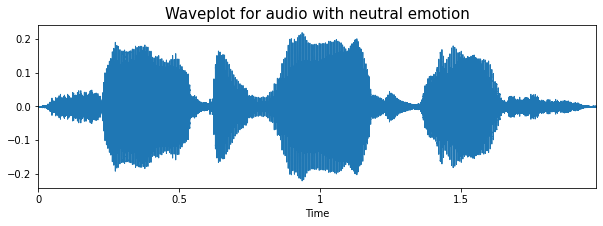

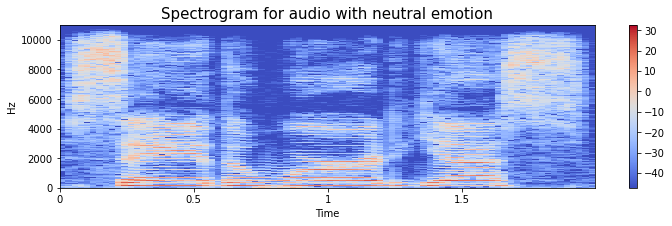

In [ ]:
#TESS
emotion='neutral'
path = np.array(data_path.Path[data_path.Emotions==emotion])[495]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

###8) Surprise

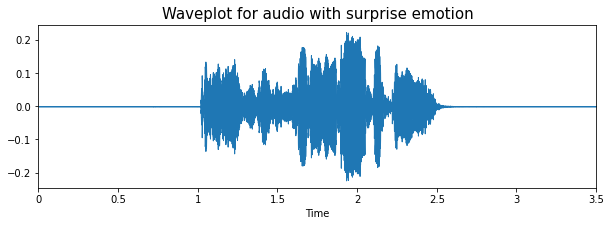

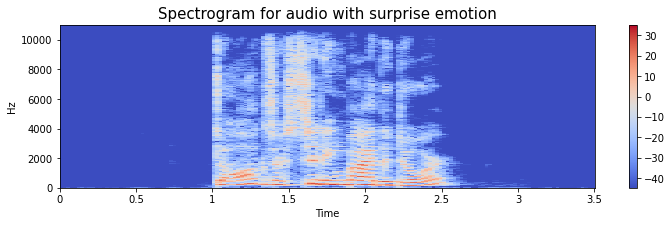

In [ ]:
#RAVDESS
emotion='surprise'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

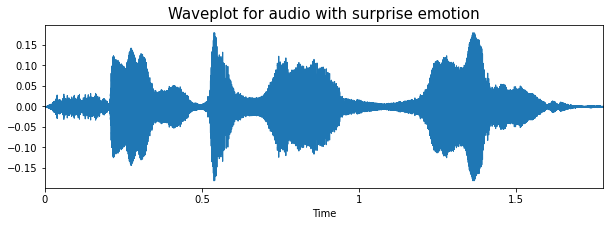

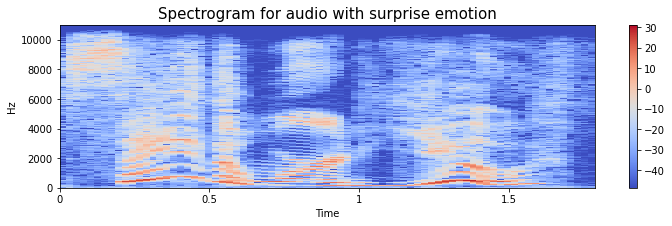

In [ ]:
#TESS
emotion='surprise'
path = np.array(data_path.Path[data_path.Emotions==emotion])[591]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

##Exploratory Data Analysis

In [ ]:
data_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Emotions  4240 non-null   object
 1   Path      4240 non-null   object
dtypes: object(2)
memory usage: 66.4+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


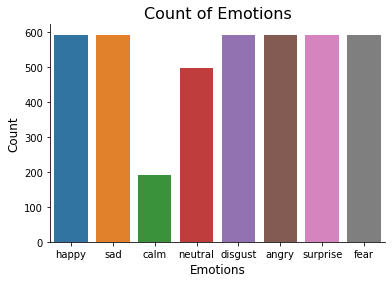

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
data_path.Emotions.value_counts()

happy       592
sad         592
disgust     592
angry       592
surprise    592
fear        592
neutral     496
calm        192
Name: Emotions, dtype: int64